<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("../data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
0

0

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 4th grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [5]:
df["YEAR"].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 1986, 1987, 1988, 1989, 1990, 1991, 2017, 2019])

There are 33 different years in the dataset.

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [6]:
dm = df.loc[df["STATE"] == "MICHIGAN", :]
dm["AVG_MATH_4_SCORE"].mean()

234.36363636363637

In [7]:
do = df.loc[df["STATE"] == "OHIO", :]
do["AVG_MATH_4_SCORE"].mean()

239.45454545454547

Ohio has the higher average math for 4th graders score across all years (239.45 vs 234.36).

Find the average for your outcome score across all states in 2019

In [8]:
dn = df.loc[df["YEAR"] == 2019, :]
dn["AVG_MATH_4_SCORE"].mean()

239.9433962264151

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [9]:
dxx = df.groupby("STATE")["AVG_MATH_4_SCORE"].max()
dxx

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [23]:
# drop rows with missing values
# create a column that conatins instruction expenditure per student data
# create a column that contains total revenue per student data
# create a column that puts instruction expenditure per student into three bins
df = df.dropna()
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_ALL_G"]
df["TOTAL_REVENUE_PER_STUDENT"] = df["TOTAL_REVENUE"] / df["GRADES_ALL_G"]
df["IEPS_BIN"] = pd.qcut(df["INSTRUCTION_EXPENDITURE_PER_STUDENT"], 3)
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT,TOTAL_REVENUE_PER_STUDENT,IEPS_BIN
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0,3.852618,7.106006,"(2.7760000000000002, 5.053]"
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0,5.700798,10.646726,"(5.053, 6.274]"
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0,2.777389,6.452031,"(2.7760000000000002, 5.053]"
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0,3.891361,7.131157,"(2.7760000000000002, 5.053]"
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0,4.609008,9.326020,"(2.7760000000000002, 5.053]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,6.821412,12.354041,"(6.274, 15.472]"
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,5.987842,12.611834,"(5.053, 6.274]"
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,6.559344,12.536947,"(6.274, 15.472]"
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,6.595384,13.410205,"(6.274, 15.472]"


Final feature list: INSTRUCTION_EXPENDITURE_PER_STUDENT and AVG_READING_4_SCORE

Feature selection justification: I think that instruction expenditure per student will affect the average 4th grade math score, because if more money is being spent on the instruction of students, it seems probable that this would help to increase test scores. Additionally, I selected average 4th grade reading score because, in general, I think that if students have a high score in one area, they are more likely to have a high score in another area.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Average 4th Grade Math Score vs Instruction Expenditure Per Student')

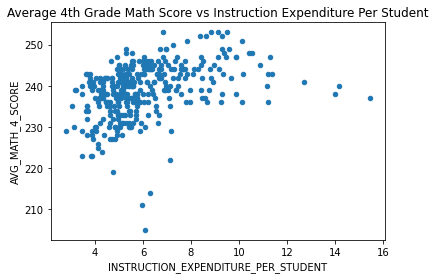

In [26]:
df.plot.scatter(x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y="AVG_MATH_4_SCORE")
plt.title("Average 4th Grade Math Score vs Instruction Expenditure Per Student")

Text(0.5, 1.0, 'Average 4th Grade Math Score Across Instruction Expenditure Per Student Bins')

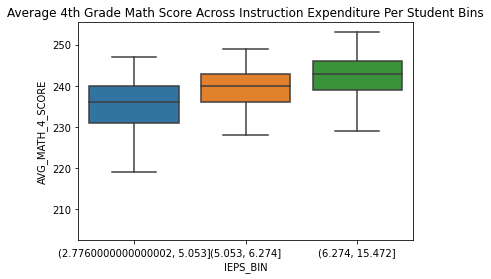

In [28]:
sns.boxplot(x="IEPS_BIN", y="AVG_MATH_4_SCORE", fliersize=0, data=df)
plt.title("Average 4th Grade Math Score Across Instruction Expenditure Per Student Bins")

In these graphs, I chose to analyze how instruction expenditure per student is related to average 4th grade math score. In the scatterplot, there appears to be a decent positive correlation between instruction expenditure per student and average 4th grade math score, which suggests that, in general, the greater the instruction expenditure per student value is, the higher the average 4th grade math score is. Additionally, I thought it would be interesting to split the instruction expenditure per student values into bins in order to visualize and analyze the relationship in a bit of a different way. The medians in the boxplot above are consistent with the conclusions I drew from the scatterplot, in that the lowest bin has the lowest median average math score, and the greatest bin has the greatest median average math score. However, there is still significnat overlap between the boxplots, whoch tells us this relationship is not absolute.

**Visualization 2**

Text(0.5, 1.0, 'Average 4th Grade Math Score vs Average 4th Grade Reading Score')

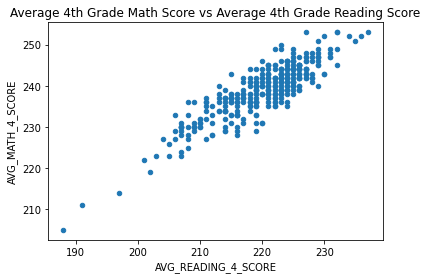

In [29]:
df.plot.scatter(x="AVG_READING_4_SCORE", y="AVG_MATH_4_SCORE")
plt.title("Average 4th Grade Math Score vs Average 4th Grade Reading Score")

In this scatterplot, I chose to analyze the relationship between average 4th grade math score and average 4th grade reading score. There is a strong positive correlation in the scatterplot, which suggests that a high average 4th grade reading score is associated with a high average 4th grade math score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['AVG_READING_4_SCORE','INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: Regression

In [17]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [18]:
# create your model here
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Intercept and coefficients for model.
print(model.intercept_)
print(model.coef_)

48.331633790708224
[ 0.86755261 -0.04722603]


In [32]:
# R**2 value describes how well a linear model fits the data
model.score(X_test, y_test)

0.6968746310199754

r^2 = 0.697 = 69.7% of the variation in average 4th grade math score is explained by average 4th grade reading score and instruction expenditure per student.

In [33]:
# mean error
np.mean(model.predict(X_test)-y_test)

-0.2536416753439476

In [34]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

2.8626304018895543

In [35]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.549572826964864

In [36]:
y_pred = model.predict(X_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Math 4 Score')

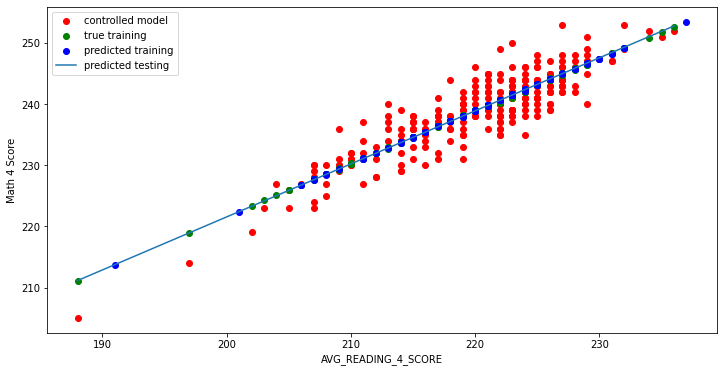

In [37]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'AVG_READING_4_SCORE'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("Math 4 Score")

<h2> Summary </h2>

After completing this checkpoint on the education data, I discovered some different things. After playing around with different variables (year, state, expenditures, revenue, test scores, etc), I decided to focus on two variables to help predict my chosen outcome variable of 4th grade math scores. The first of which was instruction expenditure per student. I created this feature by dividing total instruction expenditure by the count of all students in the state. When graphing instruction expenditure per student against average 4th grade math scores, I found a decent positive correlation between the two variables. The second variable I analyzed to help predict 4th grade math scores was average 4th grade reading scores. My thought process was that a high reading score probably means there will also be a high math score, and, when visualizing the data, I did indeed find a strong positive correlation between average 4th grade reading score and average 4th grade math score. I then created a linear regression model to predict 4th grade math score based off of the instruction expenditure per student variable and the average 4th grade reading score variable. This model works fairly well, as the r^2 value is 0.697, meaning 69.7% of the variation in average 4th grade math score is explained by average 4th grade reading score and instruction expenditure per student. 